<a href="https://colab.research.google.com/github/Dethkalleon/AILabs/blob/AILab2/AI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение Гугл Диска

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Подключение библиотек и считывание CSV

In [57]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('/content/drive/MyDrive/Salary_Data.csv')

data['Education Level'] = data['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "phD": "PhD"
})

# 1/2. Название Датасета и Постановка Задачи

In [58]:
# 1. Название датасета
print("Название датасета: Salary Data")

# 2. Постановка задачи
print("Цель задачи — предсказать зарплату (Salary) на основе различных факторов")

Название датасета: Salary Data
Цель задачи — предсказать зарплату (Salary) на основе различных факторов


# 3. Гистограмма и уникальные значения

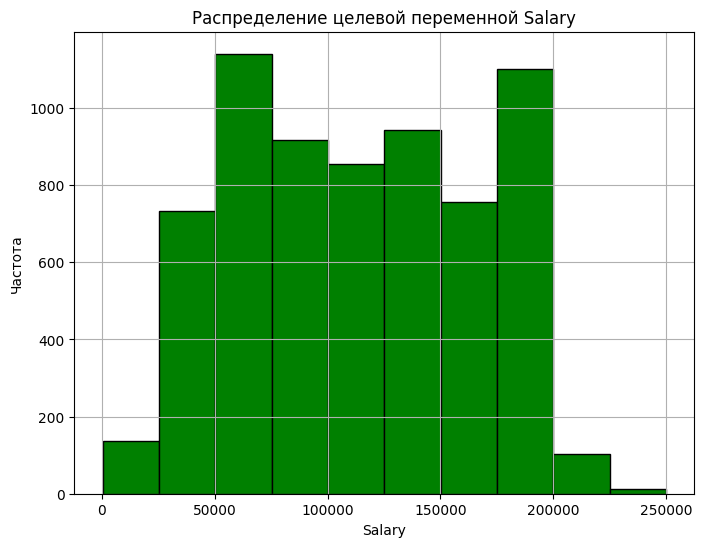

Количество уникальных значений в Salary: 444


In [59]:
# 3. Гистограмма для целевой переменной (Salary)
plt.figure(figsize=(8, 6))
plt.hist(data['Salary'].dropna(), bins=10, color='green', edgecolor='black')
plt.title('Распределение целевой переменной Salary')
plt.xlabel('Salary')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Количество уникальных значений целевой переменной
unique_salaries = data['Salary'].nunique()
print(f"Количество уникальных значений в Salary: {unique_salaries}")

# 4. Основные статистики

In [60]:
# 4. Основные статистики по переменным
print("Основные статистики по переменным:\n", data.describe(include='all'))

Основные статистики по переменным:
                 Age Gender Education Level          Job Title  \
count   6702.000000   6702            6701               6702   
unique          NaN      3               4                193   
top             NaN   Male      Bachelor's  Software Engineer   
freq            NaN   3674            3023                518   
mean      33.620859    NaN             NaN                NaN   
std        7.614633    NaN             NaN                NaN   
min       21.000000    NaN             NaN                NaN   
25%       28.000000    NaN             NaN                NaN   
50%       32.000000    NaN             NaN                NaN   
75%       38.000000    NaN             NaN                NaN   
max       62.000000    NaN             NaN                NaN   

        Years of Experience         Salary  
count           6701.000000    6699.000000  
unique                  NaN            NaN  
top                     NaN            NaN  
fre

# 5. Основная информация

In [61]:
# 5. Основная информация по датасету
print("Основная информация по датасету:")
print(data.info())

Основная информация по датасету:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None


# 6. Количество пропусков

In [62]:
# 6. Количество пропусков (NaN)
missing_values = data.isnull().sum()
print(f"\nКоличество пропусков:\n{missing_values}")


Количество пропусков:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


**Пропуски могли возникнуть из-за отсутствия данных при заполнении**

# 7. Гистограммы признаков

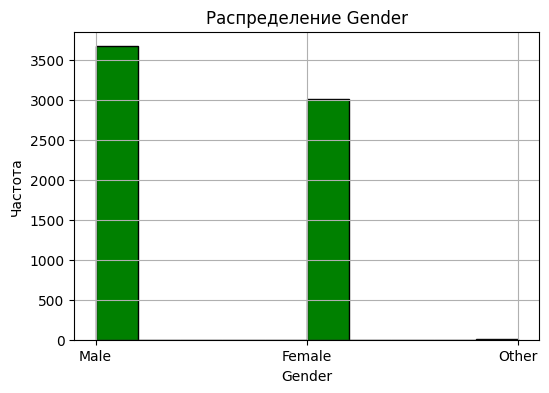

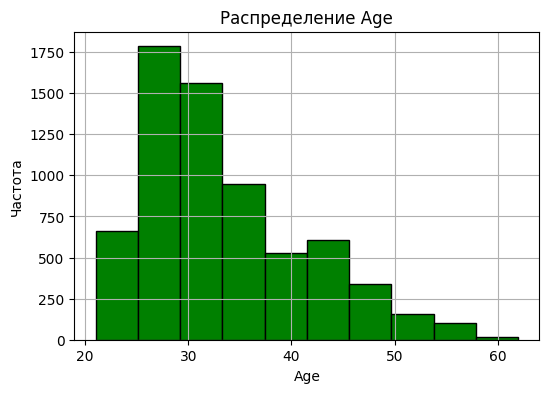

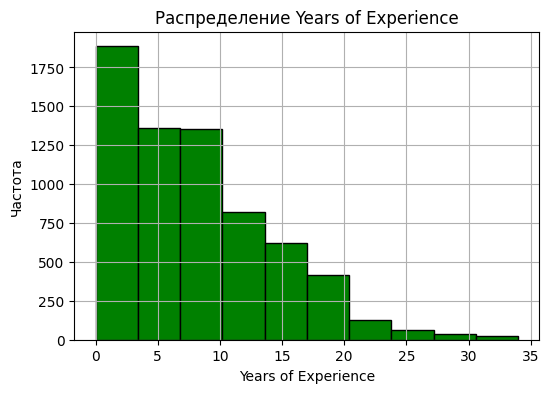

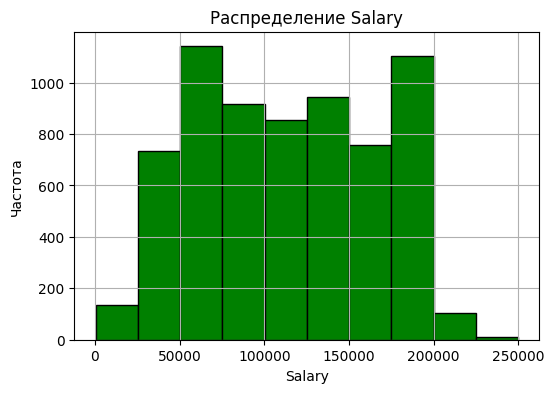

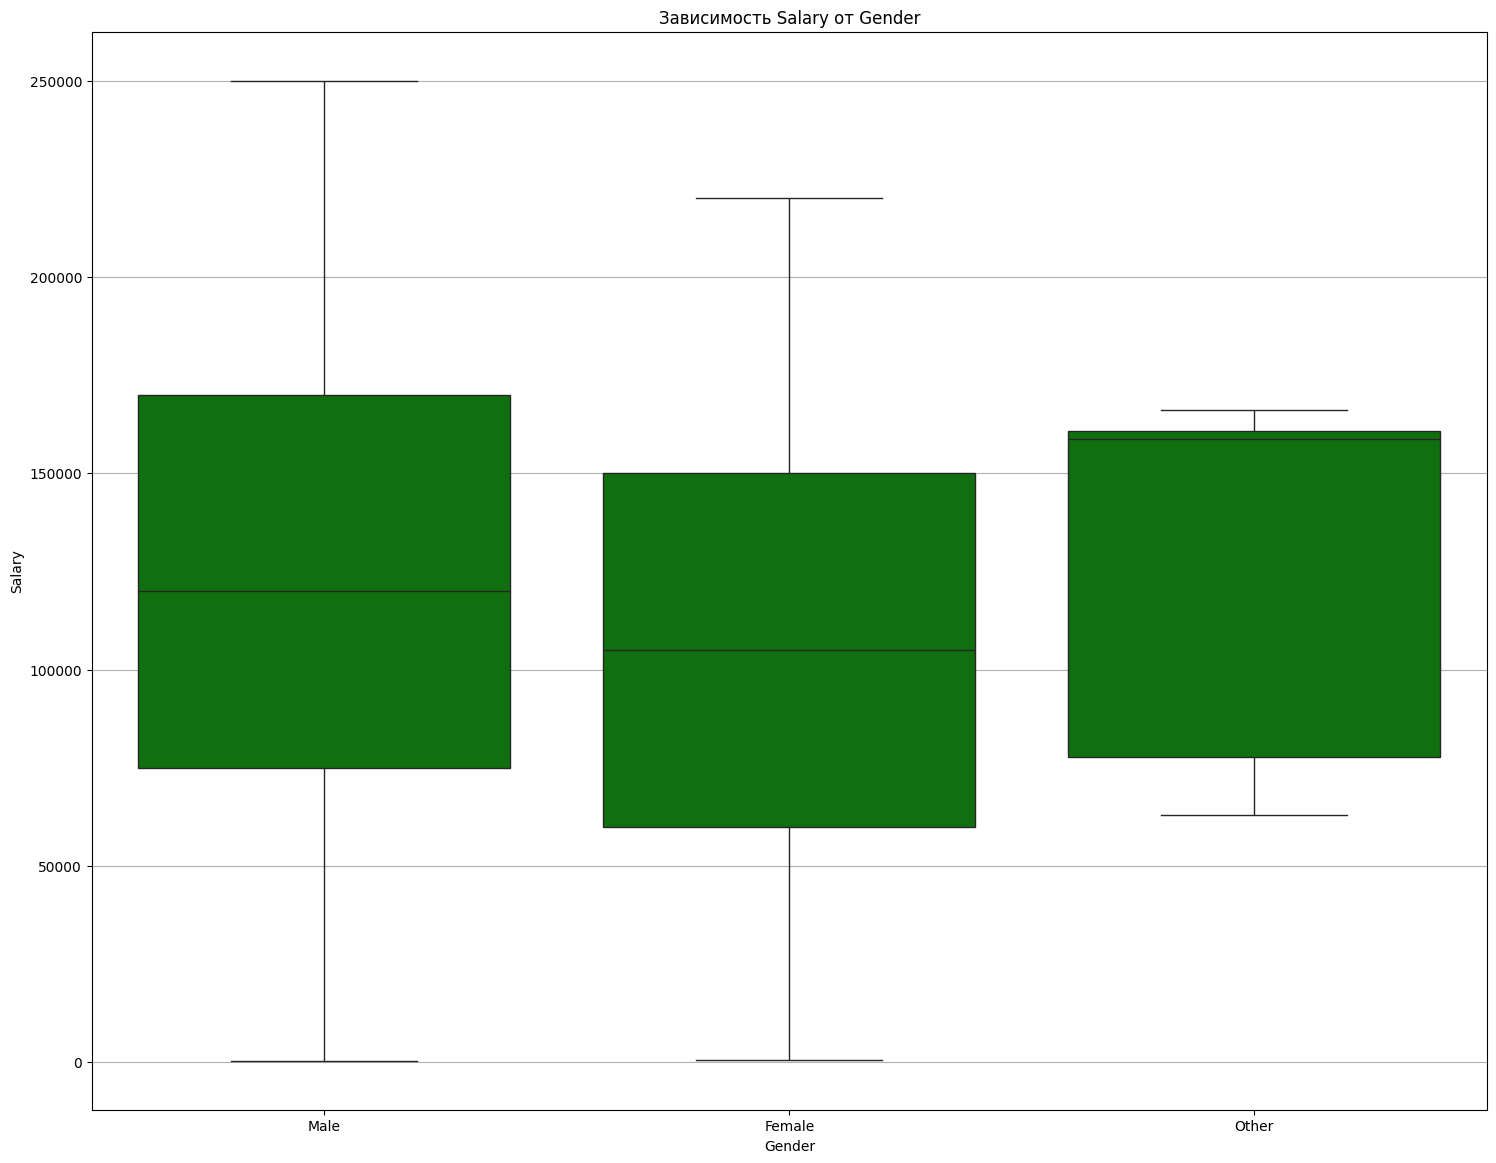

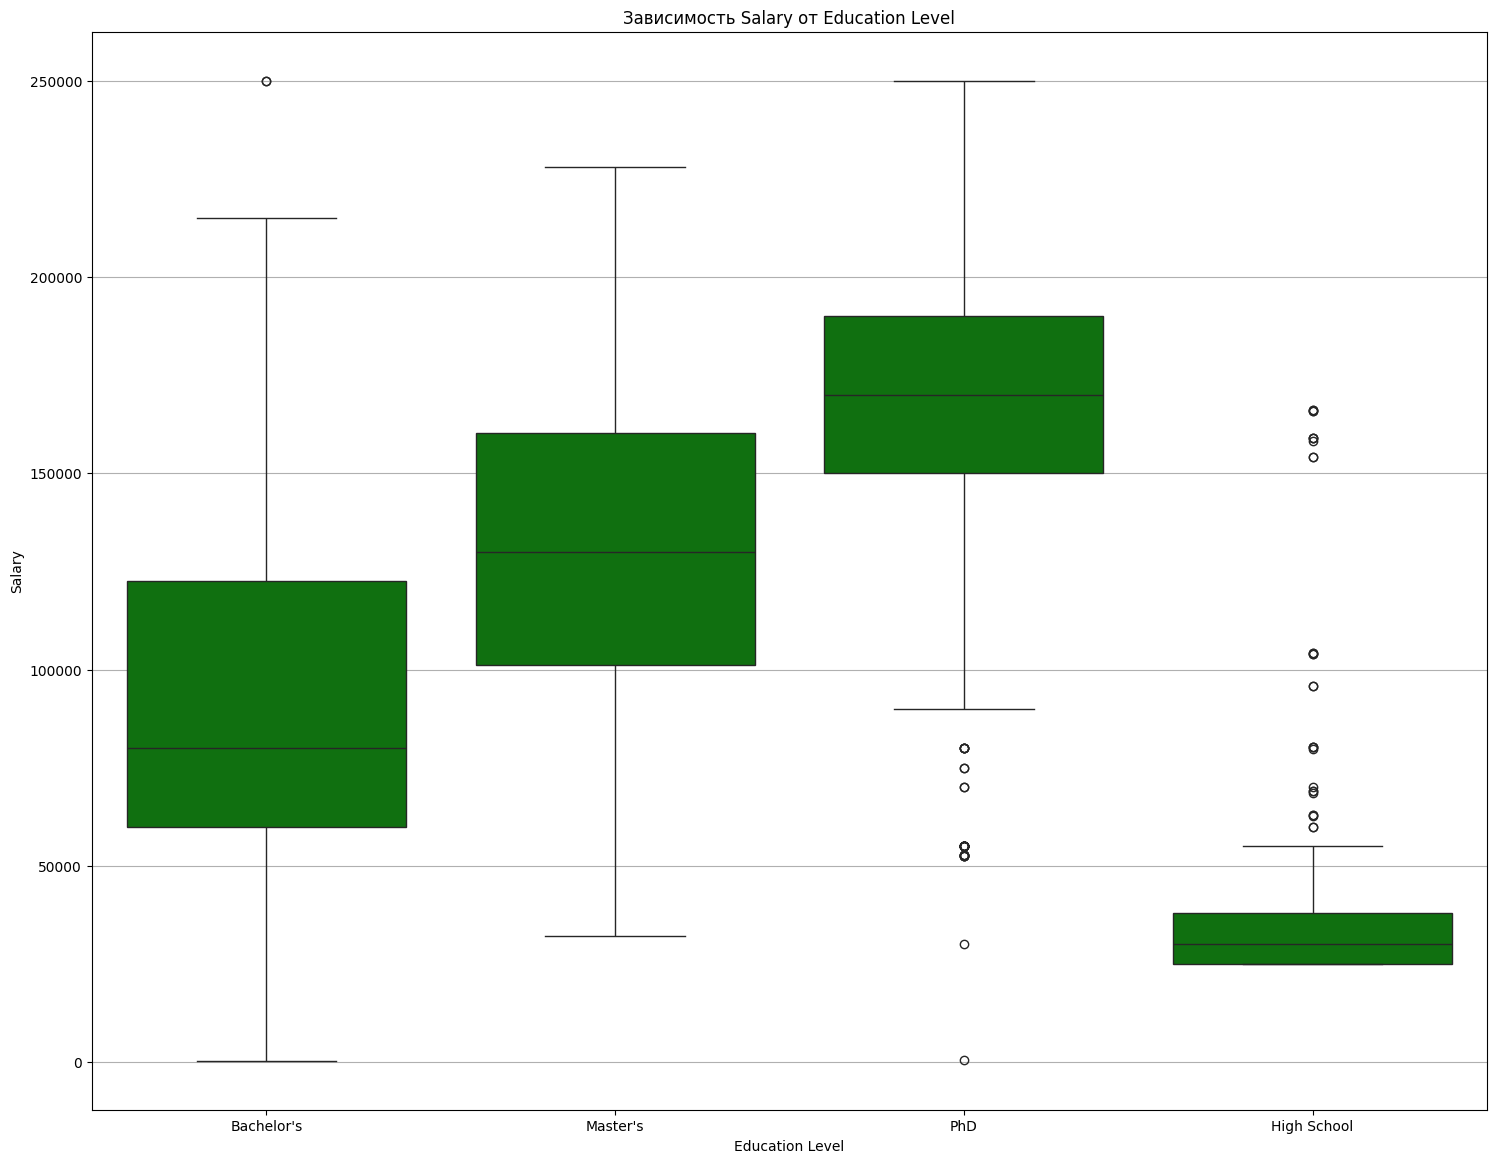

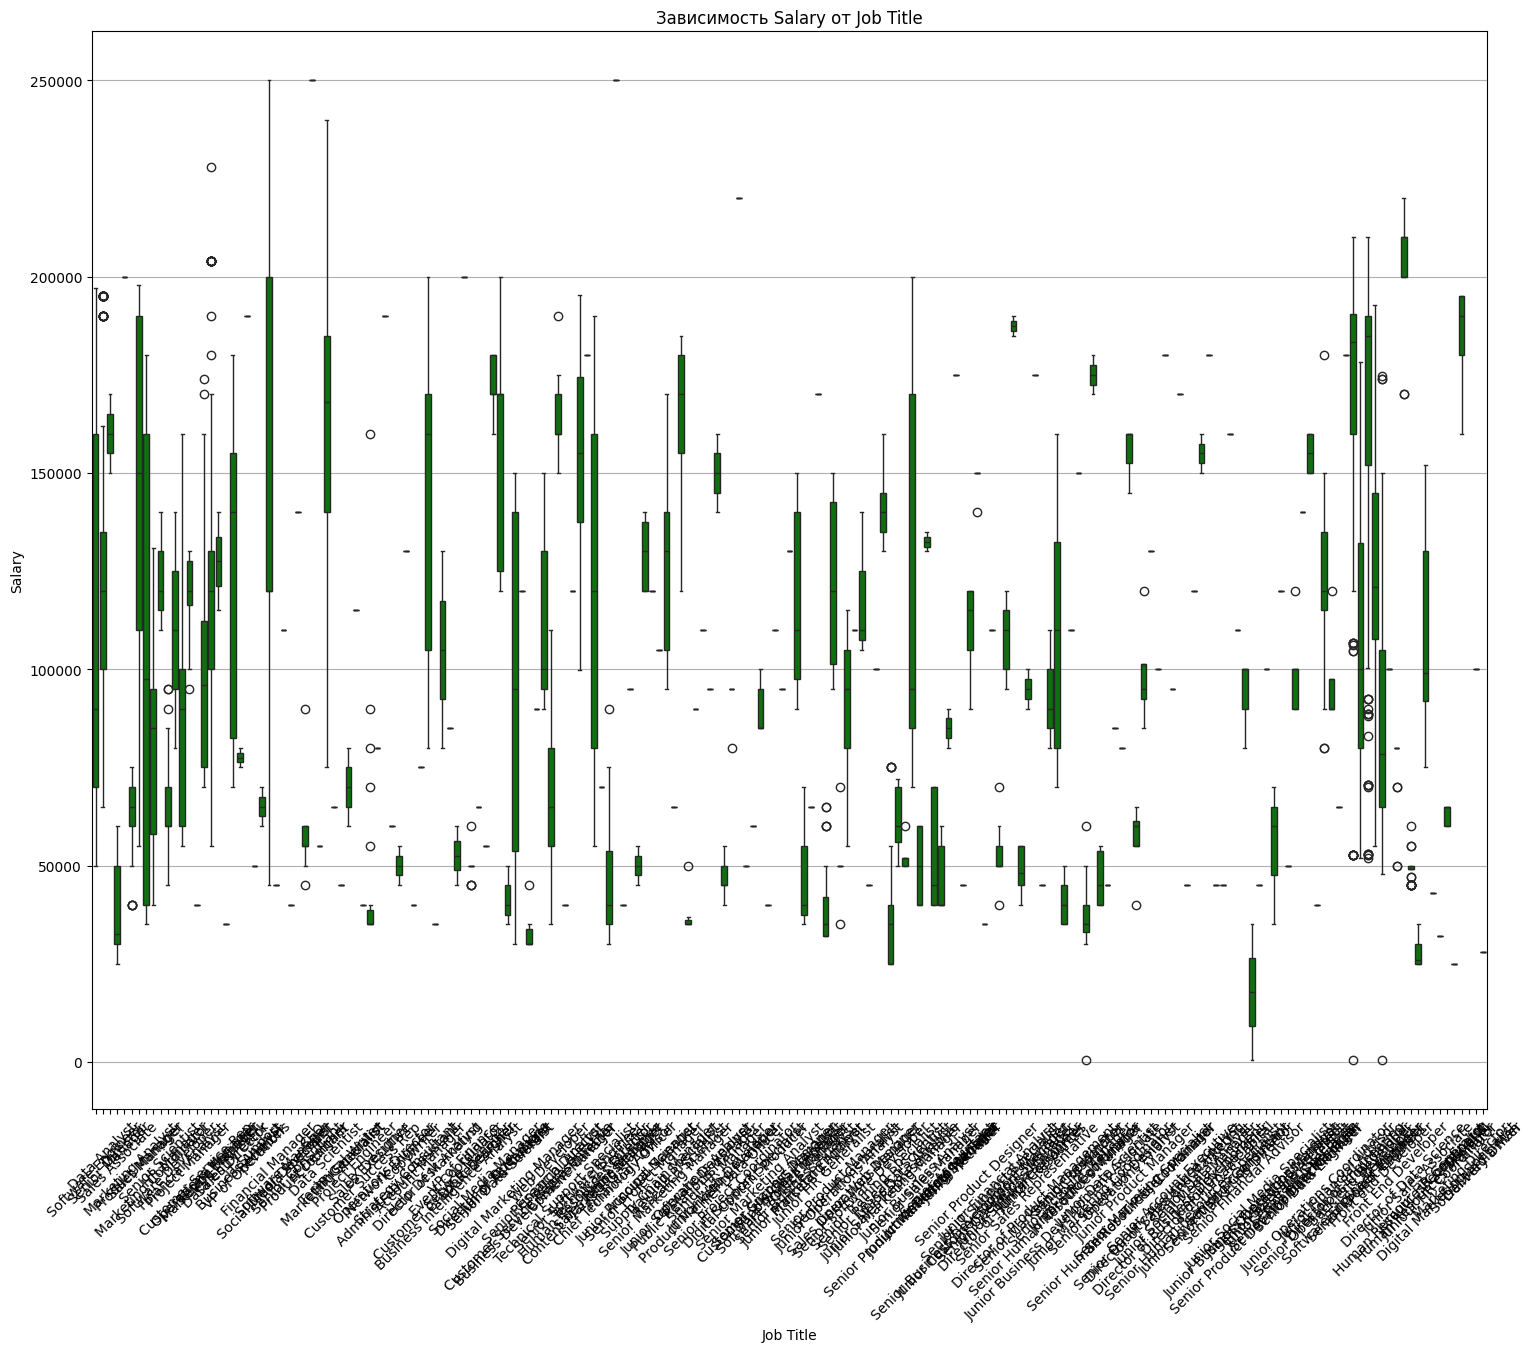

In [63]:
# 7. Гистограммы признаков
features = ['Gender', 'Age', 'Years of Experience', 'Salary']
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.hist(data[feature].dropna(), bins=10, color='green', edgecolor='black')
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

categorical_features = ['Gender', 'Education Level', 'Job Title']
i=8
j=6
for feature in categorical_features:
    plt.figure(figsize=(i+10, j+8))
    sns.boxplot(x=feature, y='Salary', data=data, color='green')
    plt.title(f'Зависимость Salary от {feature}')
    plt.xlabel(feature)
    plt.ylabel('Salary')
    plt.xticks(rotation=45 if feature == 'Job Title' else 0)
    plt.grid(axis='y')
    plt.show()



**Наблюдается дисбаланс между категориями Мужчина и Женщина. Мужчин работает немного больше. В свою очередь, категория Другие практически отсутствует**

**Распределение асимметричное, со сдвигом влево. Большинство данных сосредоточено в диапазоне от 20 до 35 лет, что указывает на преобладание более молодых участников**

**Также асимметричное распределение, со сдвигом влево. Основная масса участников имеет опыт работы от 0 до 10 лет, и количество резко снижается с увеличением опыта**

**Распределение ближе к равномерному. Наблюдается значительное количество участников с зарплатой от 50,000 до 150,000, при этом менее 50,000 и более 200,000 встречаются сильно реже**

# 8. Графики зависимости от целевой переменной

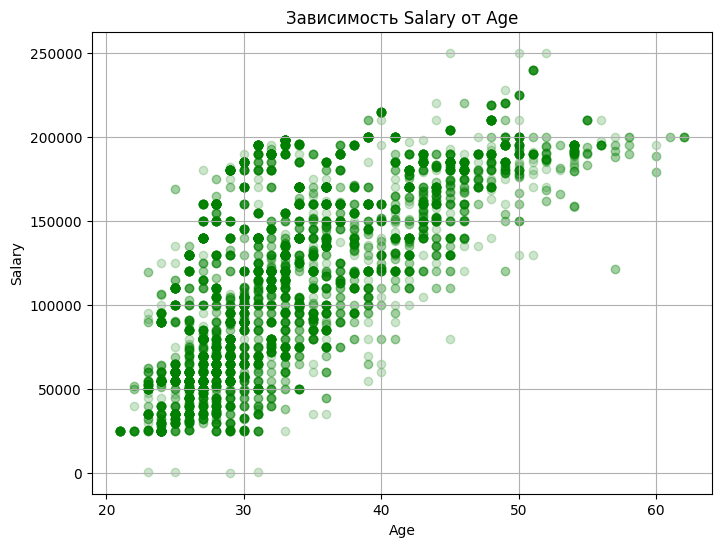

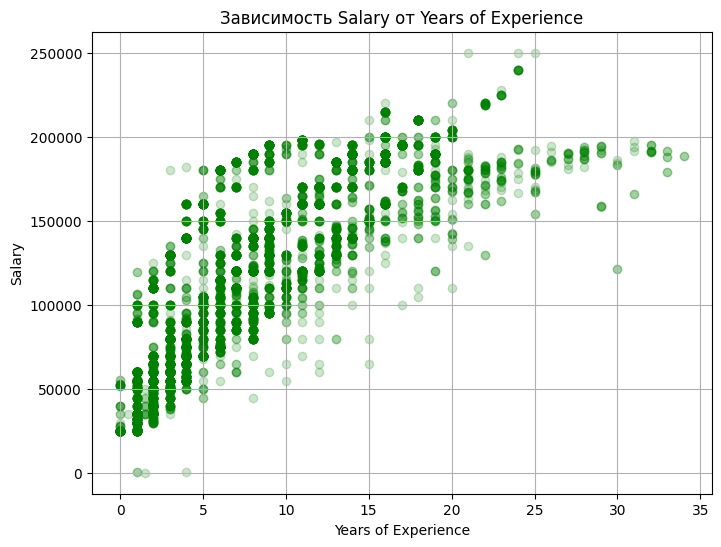

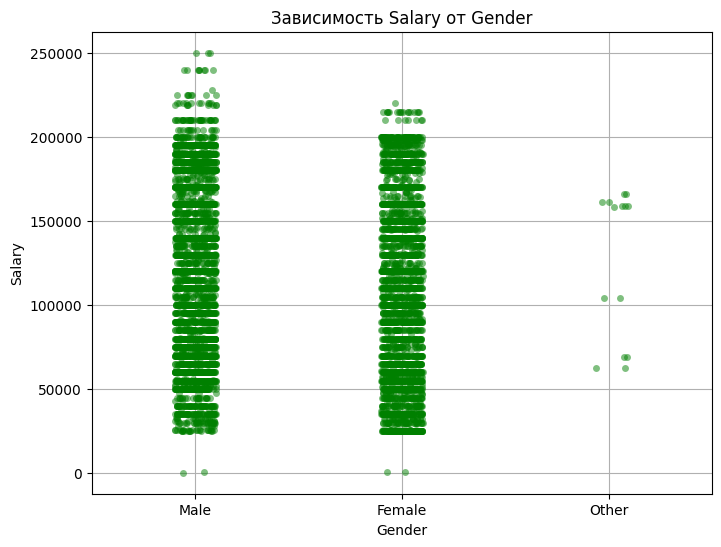

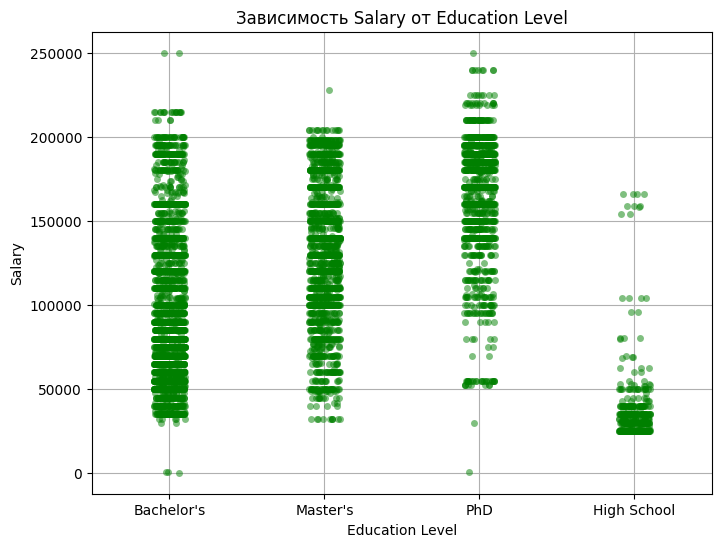

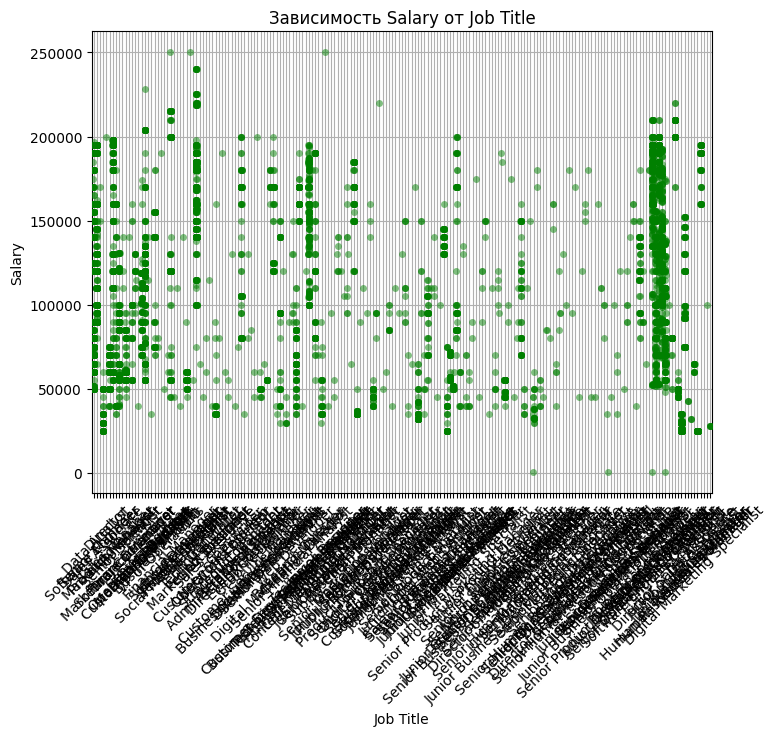

In [64]:
# 8. Графики зависимости переменных от целевой переменной
variables = ['Age', 'Years of Experience', 'Gender', 'Education Level', 'Job Title']

for var in variables:
    plt.figure(figsize=(8, 6))

    if var in ['Gender', 'Education Level', 'Job Title']:
        sns.stripplot(x=var, y='Salary', data=data, color='green', size=5, alpha=0.5)
        plt.xticks(rotation=45 if var == 'Job Title' else 0)
    else:
        plt.scatter(data[var], data['Salary'], color='green', alpha=0.2)

    plt.title(f'Зависимость Salary от {var}')
    plt.xlabel(var)
    plt.ylabel('Salary')
    plt.grid(True)
    plt.show()



**Зарплата увеличивается с опытом работы и возрастом, что свидетельствует о зависимости**

**Мужчины зарабатывают в среднем больше, чем женщины**

**Чем выше уровень образования, тем выше зарплата**

**Позиции высокого уровня зарабатывают больше, чем начальные**